## Importation des modules nécessaires à l'élaboration du projet

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Examinons la donnée

In [2]:
attrition_data_init = pd.read_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/attrition_train.csv')
attrition_test_init = pd.read_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/attrition_test.csv')

In [3]:
# on enleve les columns qui ne comprennent qu'une seule valeur, ainsi que le numéro d'employé.
attrition_data = attrition_data_init.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis =1)
attrition_test = attrition_test_init.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis =1)

In [4]:
# le jeu de test comprend une colonne index qui n'est pas utile
attrition_test = attrition_test.drop('index1', axis=1)

#### Valeurs manquantes

In [5]:
attrition_data.isna().sum().sum()

0

0 valeur manquante donc RAS

#### Valeurs aberrantes

In [6]:
df_quant = attrition_data.select_dtypes(include=['float64','int64'])
df_cat = attrition_data.select_dtypes(include=['object'])

In [7]:
df_quant.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.854545,804.234545,9.301818,2.907273,2.730909,66.011818,2.707273,2.064545,2.737273,6536.102727,...,3.155455,2.697273,0.785455,11.206364,2.780909,2.780909,7.070000,4.250000,2.186364,4.199091
std,9.039229,405.583238,8.093392,1.012453,1.083564,20.374359,0.731298,1.115862,1.107125,4729.940355,...,0.362502,1.084338,0.848575,7.784761,1.309377,0.706269,6.147387,3.595094,3.234650,3.584848
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2906.500000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,805.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4938.500000,...,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.250000,1162.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8516.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


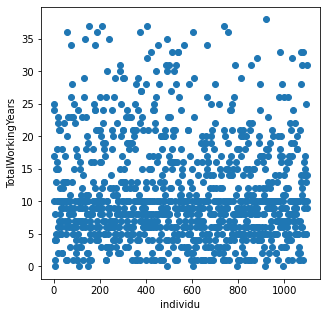

In [8]:
# La seule variable qui pourrait présenter des valeurs aberrantes est DailyRate
x = df_quant.index
y = df_quant.TotalWorkingYears

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.ylabel('TotalWorkingYears')
plt.xlabel('individu')
plt.show()

Il n'y a pas de valeurs quantitative aberrantes

In [9]:
# On vérifie les valeurs categorielles pour observer la présence de valeurs aberrantes
for col in df_cat.columns:
    print("columns: ",col)
    print(df_cat[col].unique())

columns:  Attrition
['No' 'Yes']
columns:  BusinessTravel
['Travel_Frequently' 'Non-Travel' 'Travel_Rarely']
columns:  Department
['Research & Development' 'Sales' 'Human Resources']
columns:  EducationField
['Life Sciences' 'Medical' 'Human Resources' 'Other' 'Marketing'
 'Technical Degree']
columns:  Gender
['Female' 'Male']
columns:  JobRole
['Manufacturing Director' 'Laboratory Technician' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Healthcare Representative'
 'Manager' 'Sales Representative' 'Human Resources']
columns:  MaritalStatus
['Single' 'Married' 'Divorced']
columns:  OverTime
['Yes' 'No']


il n'y a pas de valeurs categorielles aberrantes.

#### les variables à 2 valeurs peuvent être modifiée en quantitatives

In [10]:
attrition_data["OverTime"] = attrition_data["OverTime"].map(dict(Yes=1, No=0)).astype('int64')

In [11]:
attrition_data["Gender"] = attrition_data["Gender"].map(dict(Male=1, Female=0)).astype('int64')

## Création de notre modèle

### Encodage de nos variables catégorielles

In [12]:
cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(attrition_data[var], prefix=var)
    data1=attrition_data.join(cat_list)
    attrition_data=data1

for var in cat_vars:
    cat_list2='var'+'_'+var
    cat_list2 = pd.get_dummies(attrition_test[var], prefix=var)
    data2=attrition_test.join(cat_list2)
    attrition_test=data2

In [13]:
# from sklearn import preprocessing

# cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# label_encoding = preprocessing.LabelEncoder()

# for var in cat_vars:
#     attrition_data['{}_Cat'.format(var)] = label_encoding.fit_transform(attrition_data[var])

# cat_vars2 = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# for var in cat_vars2:
#     attrition_test['{}_Cat'.format(var)] = label_encoding.fit_transform(attrition_test[var])

In [14]:
attrition_data_numbers = attrition_data.drop(cat_vars, axis=1)

In [15]:
attrition_test_numbers = attrition_test.drop(cat_vars, axis=1)

In [16]:
attrition_data['Attrition'] = attrition_data['Attrition'].replace(['Yes', 'No'], [1, 0])
attrition_data_numbers = attrition_data_numbers.drop('Attrition', axis=1)

In [17]:
columns_list = attrition_data_numbers.columns

#### Polynomiales

In [18]:
# 'DistanceFromHome', '', 'Gender',
#        'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
#        'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
#        'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
#        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
#        'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
#        'EducationField_Life Sciences', 'EducationField_Medical',
#        'EducationField_Other', 'JobRole_Healthcare Representative',
#        'JobRole_Manufacturing Director', 'JobRole_Research Director',
#        'JobRole_Research Scientist', 'JobRole_Sales Representative',
#        'MaritalStatus_Divorced', 'MaritalStatus_Married'],
#       dtype='object'

In [19]:
# X = attrition_data_numbers
# y = attrition_data['Attrition']

In [49]:

from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(2)
# attrition_data_numbers = poly.fit_transform(X)

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X)
attrition_data_numbers_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names())

poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x0 x18',
 'x0 x19',
 'x0 x20',
 'x0 x21',
 'x0 x22',
 'x0 x23',
 'x0 x24',
 'x0 x25',
 'x0 x26',
 'x0 x27',
 'x0 x28',
 'x0 x29',
 'x0 x30',
 'x0 x31',
 'x0 x32',
 'x0 x33',
 'x0 x34',
 'x0 x35',
 'x0 x36',
 'x0 x37',
 'x0 x38',
 'x0 x39',
 'x0 x40',
 'x0 x41',
 'x0 x42',
 'x0 x43',
 'x0 x44',
 'x0 x45',
 'x0 x46',
 'x0 x47',
 'x0 x48',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 

## scaling

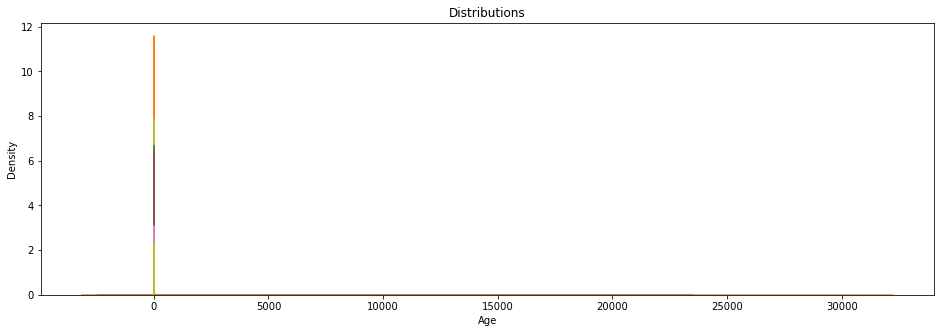

In [21]:
fig, a = plt.subplots(ncols=1, figsize=(16, 5))
a.set_title("Distributions")
for col in attrition_data_numbers.columns:
    sns.kdeplot(attrition_data_numbers[col], ax=a)
plt.show()

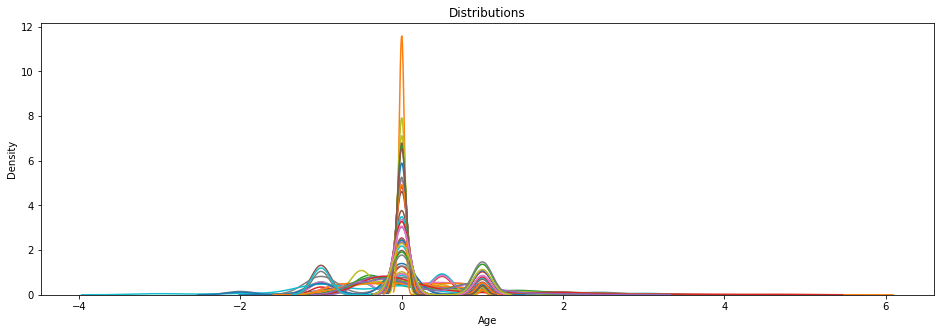

In [22]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler, MinMaxScaler,RobustScaler

# scaler = MaxAbsScaler()
# scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler = RobustScaler()

scaled_df = scaler.fit_transform(attrition_data_numbers)

scaled_df = pd.DataFrame(scaled_df, columns=attrition_data_numbers.columns)

fig, a = plt.subplots(ncols=1, figsize=(16, 5))
a.set_title("Distributions")
for col in scaled_df.columns:
    sns.kdeplot(scaled_df[col], ax=a)
plt.show()

In [23]:
attrition_data_numbers = scaled_df

In [24]:
attrition_data_numbers

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.163265,-0.805417,-0.416667,0.5,-1.0,-1.0,0.250000,1.0,0.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.306122,-0.688525,1.750000,-0.5,0.5,-1.0,-0.194444,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.653061,0.956522,-0.500000,0.0,0.0,-1.0,-0.305556,-2.0,0.0,0.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.571429,0.163934,-0.333333,0.0,0.0,0.0,0.833333,-2.0,1.5,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.734694,-0.516037,-0.333333,0.0,0.5,0.0,-0.444444,0.0,-0.5,0.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.979592,-0.128297,-0.500000,0.0,0.5,0.0,0.277778,-1.0,1.5,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1096,0.734694,-0.896650,-0.250000,0.0,0.0,-1.0,-0.277778,-2.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1097,-0.244898,-0.411974,0.083333,1.0,0.5,0.0,0.083333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1098,-0.571429,0.985032,-0.500000,-1.0,0.5,0.0,-0.694444,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Mise en place de notre modèle de régression logistique

In [25]:
y = attrition_data['Attrition']
X = attrition_data_numbers
X_pred = attrition_test_numbers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
my_model = LogisticRegressionCV(Cs = 10, cv=5, penalty = 'l2',solver='liblinear')

In [27]:
my_model.fit(X_train, y_train)

LogisticRegressionCV(cv=5, solver='liblinear')

In [28]:
prediction = my_model.predict(X_test)

In [29]:
score = my_model.score(X_test, y_test)
print('Test Accuracy Score :', score)

Test Accuracy Score : 0.8681818181818182


In [30]:
print('F-mesure :', f1_score(y_test,prediction, average="macro"))

F-mesure : 0.724036506769324


In [31]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[175,   9],
       [ 20,  16]])

Text(0.5, 257.44, 'Predicted label')

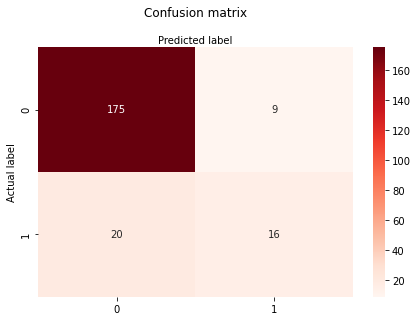

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.845


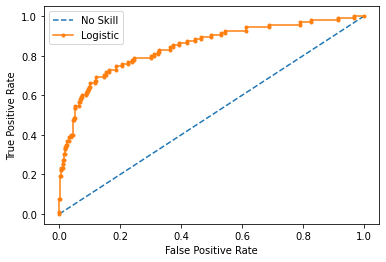

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
my_model.fit(trainX, trainy)
# predict probabilities
lr_probs = my_model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


### RFE

In [34]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [35]:
# Create the RFE object and compute a cross-validated score.
svc = LogisticRegressionCV(Cs = 10, cv=5, penalty = 'l2',solver='liblinear')


rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy',
              min_features_to_select=1)
rfecv.fit_transform(X, y)

# print(rfecv.grid_scores_)
# print(len(rfecv.grid_scores_))

array([[-0.41666667, -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.75      ,  0.5       , -1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.5       ,  0.        , -1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.08333333,  0.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5       ,  0.5       ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        , -1.        , ...,  0.        ,
         0.        ,  1.        ]])

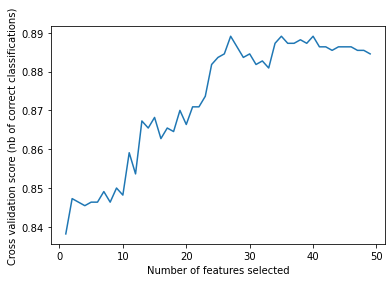

In [36]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [37]:
print("The fitted estimator used to select features: ",rfecv.estimator_)
print("The mean cross-validation score: ", rfecv.grid_scores_.mean())

The fitted estimator used to select features:  LogisticRegressionCV(cv=5, solver='liblinear')
The mean cross-validation score:  0.872430426716141


In [38]:
print("Optimal number of features in X_RFE : %d" % rfecv.n_features_)
print("The importances of features: ",rfecv.estimator_.coef_)

Optimal number of features in X_RFE : 27
The importances of features:  [[ 0.40557309 -0.81870317  0.42718246 -0.55361224 -0.63279478 -0.44510365
   0.37663241  1.63451897 -0.52751229 -0.25424346 -0.4317952  -0.23128241
  -0.44313604  0.49541692 -0.3269616  -0.80171353  0.7123635  -0.55254931
  -0.58774649 -0.649821   -0.47157271 -0.57132972 -0.40008323 -0.6185624
   0.76176484 -0.76297001 -0.63061459]]


In [39]:
# print("The feature ranking: ",rfecv.ranking_)
print("The mask of selected features.: ",rfecv.support_)
df =pd.DataFrame(rfecv.support_,index=columns_list,columns=['Rank'])
df.value_counts()

The mask of selected features.:  [False False  True False  True  True False  True False  True  True False
  True  True False False  True  True  True False  True False  True  True
  True  True  True False False False False False  True False  True  True
 False  True False False False  True  True  True False  True  True  True
 False]


Rank 
True     27
False    22
dtype: int64

In [40]:
df = df[df['Rank']==True]
rfecv_cols_to_keep = df.index

In [46]:
new_list = []

arr = rfecv.estimator_.coef_.tolist()

for i,x in enumerate(arr):
    for y in x: 
        Y =abs(y)
        new_list.append(Y)

print(new_list)

[0.4055730865845319, 0.8187031668164639, 0.42718246474619753, 0.5536122374313253, 0.6327947786250426, 0.4451036549370529, 0.3766324082298149, 1.634518968431834, 0.527512289103583, 0.25424345587148806, 0.43179520239032726, 0.23128240846427872, 0.4431360355185272, 0.4954169205326959, 0.3269616004372322, 0.801713526546176, 0.7123634984143307, 0.5525493094417862, 0.5877464946368287, 0.6498209975237909, 0.47157271157367575, 0.5713297247339909, 0.40008322743937735, 0.6185623966013218, 0.7617648441319839, 0.762970013857755, 0.630614586694371]


In [47]:
df2 =pd.DataFrame(index=rfecv_cols_to_keep,columns=['coef'])
df2['coef'] = new_list
df2.sort_values(by ='coef', ascending = False)

,coef
OverTime,1.634519
EnvironmentSatisfaction,0.818703
BusinessTravel_Non-Travel,0.801714
MaritalStatus_Divorced,0.762970
JobRole_Sales Representative,0.761765
BusinessTravel_Travel_Frequently,0.712363
EducationField_Other,0.649821
JobSatisfaction,0.632795
MaritalStatus_Married,0.630615
JobRole_Research Scientist,0.618562


On constate que 11 variables influencent positivement le score d'attrition, cad qu'elles sont prédominante dans la décision de quitter l'entreprise.

In [48]:
df2.index

Index(['DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EducationField_Other', 'JobRole_Healthcare Representative',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married'],
      dtype='object')

### Coefficients liés aux différentes variables

In [44]:
coef_dict = {}
for idx, i in enumerate(columns_list):
    coef_dict[i] = round(my_model.coef_.item(idx), 5)
#     print("La variable {} a un β égal à {:.5f}".format(i, my_model.coef_.item(idx)))

In [45]:
sorted_dict = {}
sorted_keys = sorted(coef_dict, key=coef_dict.get, reverse=True)

for w in sorted_keys:
    sorted_dict[w] = coef_dict[w]

keys_list = list(sorted_dict)

for index, key in enumerate(sorted_dict):
      print("{}. La variable {} a un β égal à {:.5f}".format(index+1, key, coef_dict[key]))

1. La variable OverTime a un β égal à 1.09117
2. La variable BusinessTravel_Travel_Frequently a un β égal à 0.78792
3. La variable DistanceFromHome a un β égal à 0.53821
4. La variable NumCompaniesWorked a un β égal à 0.43221
5. La variable YearsSinceLastPromotion a un β égal à 0.41139
6. La variable Gender a un β égal à 0.33428
7. La variable YearsAtCompany a un β égal à 0.32583
8. La variable EducationField_Human Resources a un β égal à 0.22994
9. La variable JobRole_Sales Representative a un β égal à 0.20964
10. La variable HourlyRate a un β égal à 0.13041
11. La variable PercentSalaryHike a un β égal à 0.11692
12. La variable Age a un β égal à 0.11510
13. La variable Department_Sales a un β égal à 0.08781
14. La variable MonthlyRate a un β égal à 0.07991
15. La variable Department_Research & Development a un β égal à 0.06590
16. La variable JobRole_Sales Executive a un β égal à 0.02364
17. La variable EducationField_Technical Degree a un β égal à -0.00066
18. La variable BusinessTr

On constate que 16 variables influencent positivement le score d'attrition, cad qu'elles sont prédominante dans la décision de quitter l'entreprise.